In [6]:
import pandas as pd
from utils.data_preparation.prepare_time_series import prepare_time_series_data

from utils.ensemble.ensemble_forecast import ensemble_forecast
from utils.ensemble.plot_ensemble_forecast import plot_ensemble_forecast

from utils.prediction.ensemble_prediction import run_prediction_for_vehicle

from config import DATA_CSV_FILE

Plotly JSON saved at: /home/tjselevani/Desktop/Apps/vscode/python/python analysis/json/SM024/analysis/time_series_analysis.json
ML Model Metrics: {'MAE': 950.1315789473684, 'RMSE': np.float64(1440.1048322586578), 'R2': 0.4950132764515097}


/home/tjselevani/Desktop/Apps/vscode/python/python analysis/utils/forecast/create_forecast_ml.py:85: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1245.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



TypeError: Object of type Scatter is not JSON serializable

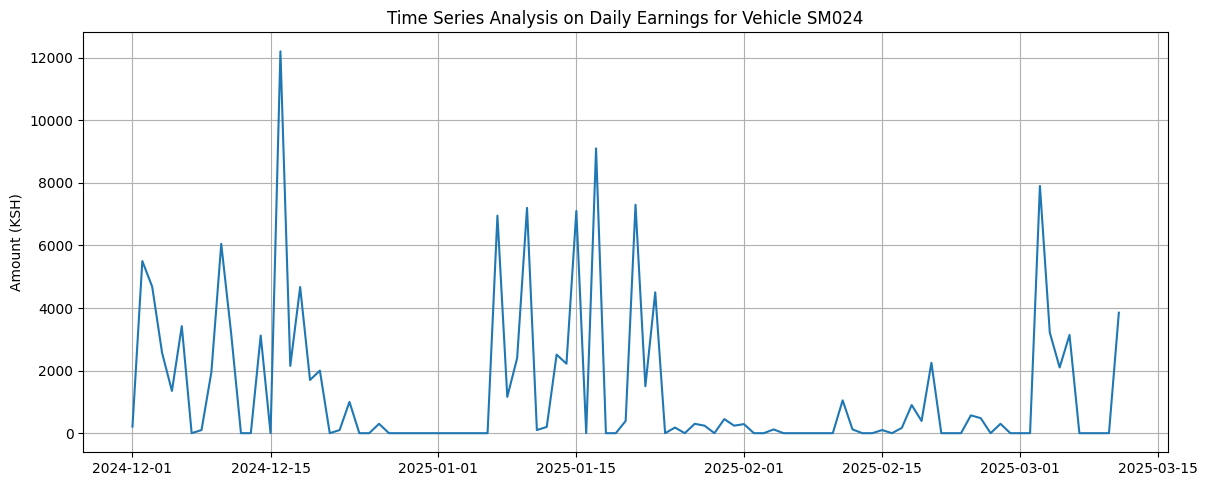

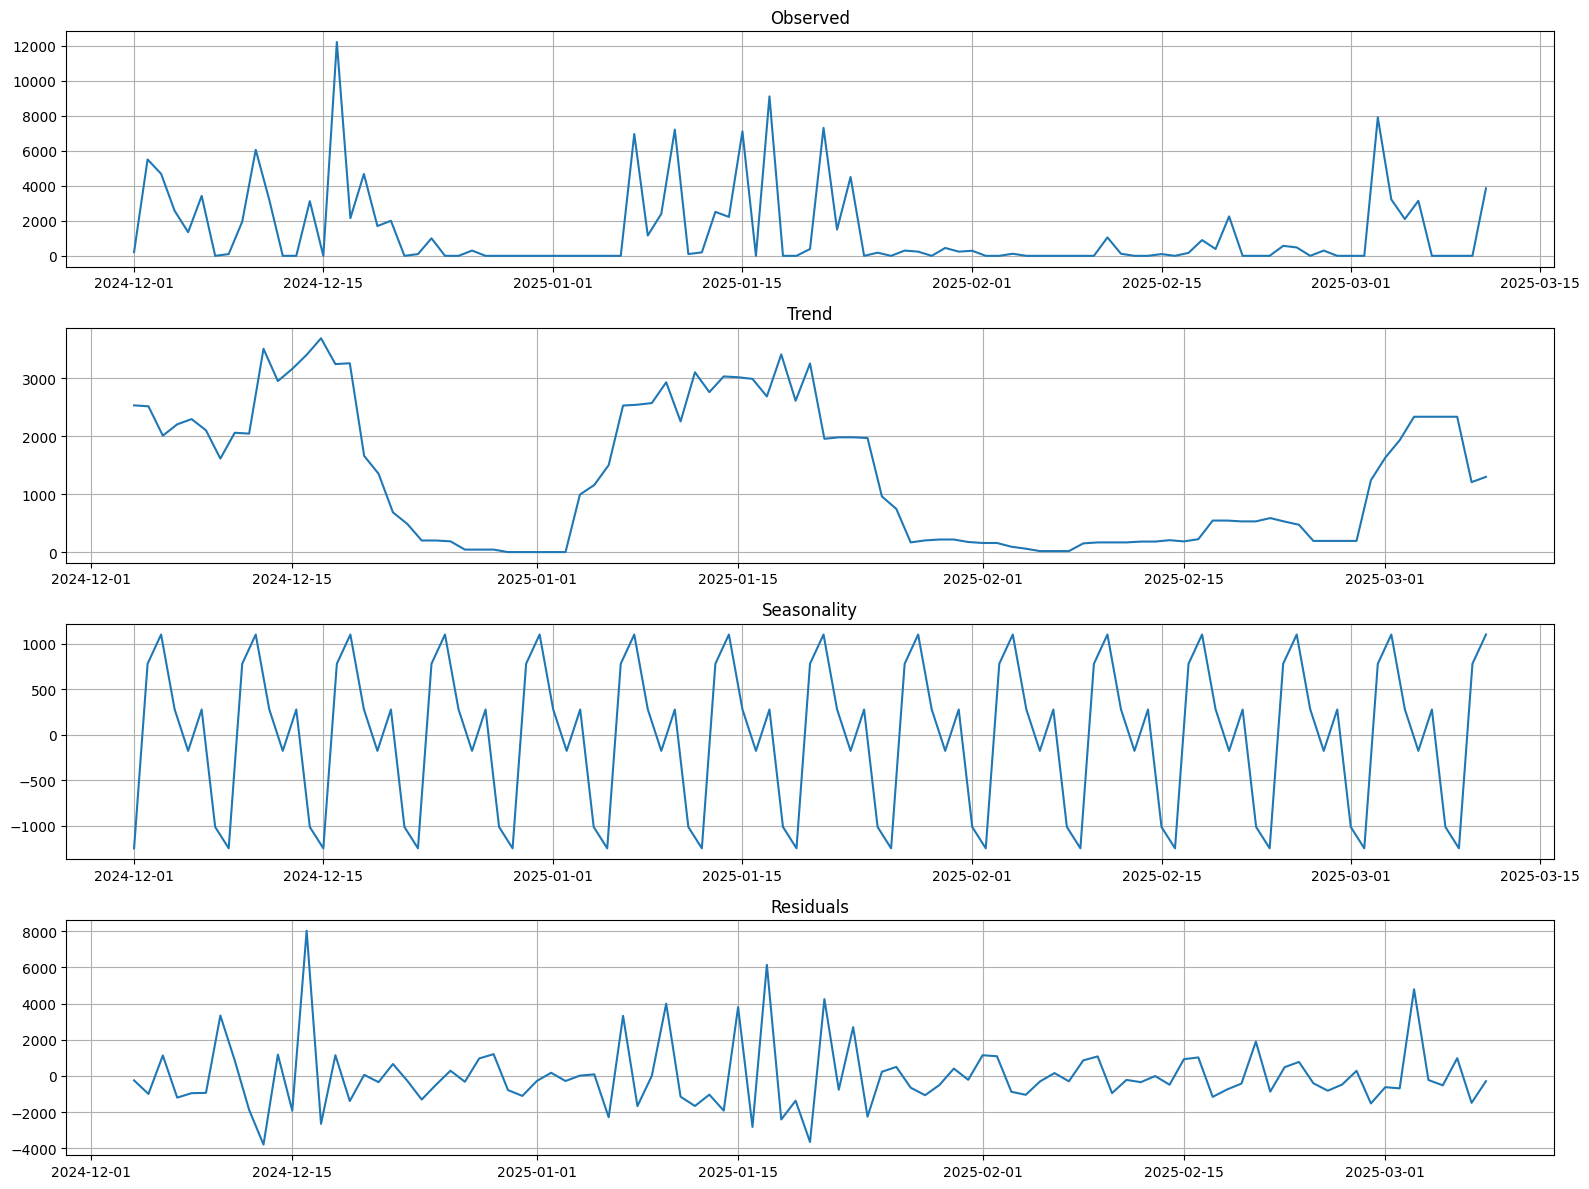

In [8]:
# Path to your data
data_path = DATA_CSV_FILE

# Vehicle to analyze
vehicle_id = "SM024"

# Run prediction for the vehicle
forecasts = run_prediction_for_vehicle(data_path, vehicle_id, forecast_days=30)

# Create ensemble forecast
ensemble_df = ensemble_forecast(forecasts)

# Plot ensemble forecast
ts_data = prepare_time_series_data(pd.read_csv(data_path), vehicle_id)
plot_ensemble_forecast(ts_data, ensemble_df, vehicle_id)

# Display the forecast for the next 7 days
print("Ensemble Forecast for the next 7 days:")
print(ensemble_df[["date", "ensemble_forecast"]].head(7))

# Calculate aggregate statistics
total_predicted = ensemble_df["ensemble_forecast"].head(7).sum()
average_daily = ensemble_df["ensemble_forecast"].head(7).mean()
print(f"Total predicted earnings for next 7 days: {total_predicted:.2f} KSH")
print(f"Average daily earnings: {average_daily:.2f} KSH")
